In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [64]:
df = pd.read_csv("DataAnalyst.csv",encoding="utf-8")

In [65]:
df.shape

(734, 6)

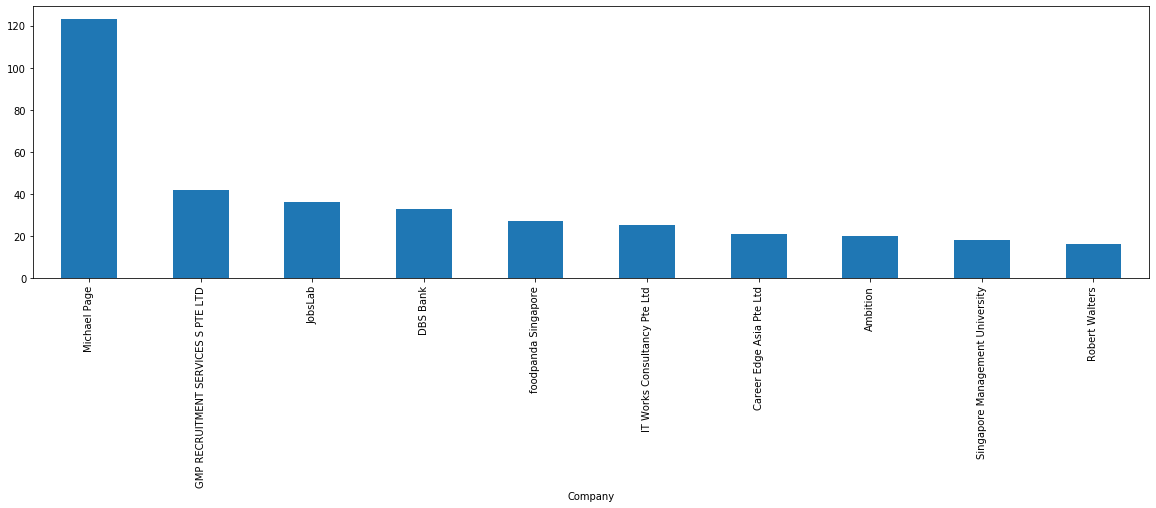

In [66]:
##Task 1: Find companies with highest number of job listings
counts = df.groupby("Company").count()["Title"].sort_values(ascending=False)[:10]
counts.plot(kind = 'bar',figsize=(20,5))

In [67]:
##Task 2: Find Locations with highest number of job listings
loc_counts = df.groupby("Location").count()["Title"].sort_values(ascending=False)[:10]
loc_counts

Location
Singapore            711
Central Singapore     15
Queenstown             3
Pasir Panjang          3
Pioneer                1
Kallang                1
Name: Title, dtype: int64

In [45]:
def format_salary(row):
    salary = row["Salary"]
    if "-" in salary:
        split = salary.split("-")
        salary_min = split[0]
        salary_max = split[1]
    else:
        salary_min = salary
        salary_max = salary
    
    row["salary_min"] = salary_min.replace("₹","").replace("a month","").replace("a year","").replace(",","")
    row["salary_max"] = salary_max.replace("₹","").replace("a month","").replace("a year","").replace(",","")
       
    if "month" in row["Salary"]:
        row["salary_min"] = int(row["salary_min"])*12
        row["salary_max"] = int(row["salary_max"])*12
    
   
    return row


df_salary = df[df["Salary"]!= "None"].dropna()
df_salary = df_salary.apply(format_salary,axis=1) 

df_salary["salary_min"] = pd.to_numeric(df_salary["salary_min"],'coerce')
df_salary["salary_max"] = pd.to_numeric(df_salary["salary_max"],'coerce')

df_salary["salary_min"].mean()

C:\Users\isslf\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


KeyError: 'salary_min'

In [68]:
def cleanData(desc):
    desc = word_tokenize(desc)
    desc = [word.lower() for word in desc if word.isalpha() and len(word) > 2]
    desc = [word for word in desc if word not in stop_words]
    return desc

In [69]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\isslf\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\isslf\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [70]:
from nltk import word_tokenize

from nltk.corpus import stopwords
stop_words = stopwords.words('english')

tags_df = df["Description"].apply(cleanData)

In [71]:
from collections import Counter
result = tags_df.apply(Counter).sum().items()
result = sorted(result, key=lambda kv: kv[1],reverse=True)
result_series = pd.Series({k: v for k, v in result})
for i in range(50):
    print(result[i])

('data', 8737)
('experience', 4170)
('business', 2009)
('analytics', 1659)
('team', 1499)
('big', 1483)
('work', 1448)
('solutions', 1399)
('technical', 1294)
('tools', 1220)
('working', 1190)
('technology', 1122)
('development', 1117)
('design', 1100)
('product', 1088)
('strong', 1067)
('engineer', 1043)
('years', 1026)
('job', 966)
('role', 922)
('knowledge', 922)
('management', 922)
('technologies', 911)
('software', 887)
('singapore', 850)
('requirements', 838)
('engineering', 816)
('platforms', 806)
('skills', 787)
('systems', 778)
('building', 751)
('support', 737)
('relevant', 731)
('science', 718)
('across', 715)
('teams', 710)
('services', 708)
('hadoop', 707)
('etc', 704)
('new', 694)
('develop', 689)
('lead', 678)
('computer', 673)
('python', 672)
('using', 665)
('environment', 661)
('build', 658)
('platform', 653)
('client', 643)
('security', 631)


In [74]:
#skills = ["tableau","power","qlik"]
#skills = ["aws","azure"]
#skills = ["nltk","pandas","numpy","matplotlib","jupyter","opencv"]
#skills = ["statistics","machine","deep","neural","predictive"]
#skills = ["experienced","expert","intern","intermediate","begineer","fresher"]
skills = ["analytics", "solution","tools","science","python","knowledge"]

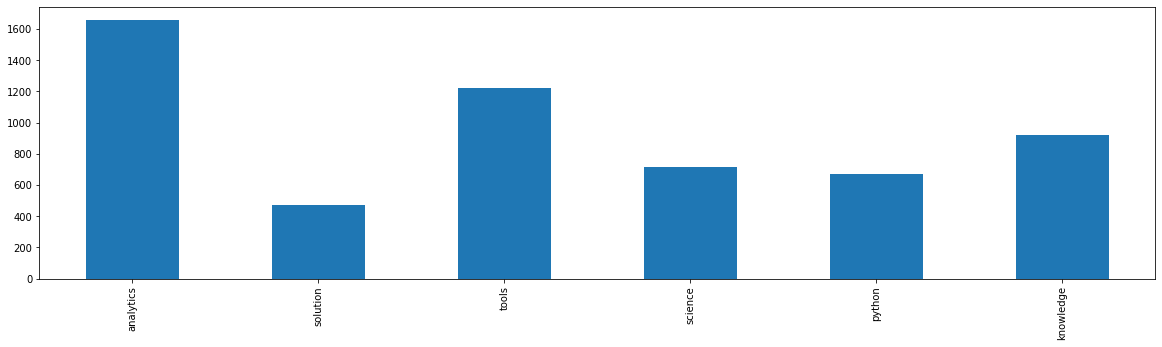

In [75]:
filter_series = result_series.filter(items=skills)
filter_series.plot(kind = 'bar',figsize=(20,5))